# Opening a Gym in London 2021

## Business Proposal

### Background information: 

London is a sprawling city with a population of roughly 8.96 million people. It is by far the largest city in the UK. Being a metropolitan city, it is home to a massive array of restaurants, cafes, and fast-food places. All of which serve a wide variety of cuisines to suite London’s incredibly diverse population.

The availability and ease at which it is to dine out in london might explain why in 2017/2018 roughly 56% of adults were classified as overweight or obese. And, by contrast, a significantly higher number percentage of young children were classed as overweight or obese.

Furthermore, with the recent Covid-19 pandemic and the lockdown measures that followed. For both schools and sports facilities. It is reasonable to assume that many of London’s residences saw a decline in their physical activity levels, it is important to note that many have used the extra time afford to work out from home.

So, if someone either living in London or is thinking of moving to London and is either looking to stay in shape or become more active it might be useful if they have some information about the availability of Gyms and their quality.

Moreover, with the potential of contracting Covid and the UK’s lockdown policies. Prior information of vaccination data per region might help in making more informed decision. Such as, choosing a gym in an area which boasts a higher vaccination registration than other. Thus, using data from the Office of National Statistics, London Datastore, and the Foursquare API, gyms will be listed and visualised.


### The objective: 

Say perhaps you are someone who lives in London and is currently searching for a gym, or perhaps you have aspirations to be a gym owner. Where is the ideal place to open a gym during covid times?

Well, by utilising, the average health index of each brough, the registered number of vaccinations per borough in London, and foursquare API. Gyms throughout the UK can be visualised, rated and listed.


### Target Audience: 

There are three main audience’s this project will target:
<ul>
    <li>London residents looking for a gym</li>
    <li>Travelers looking to join a gym</li>
    <li>People looking to open up a new gym</li>
</ul>

## Data Description:

### The Health Index 2015 - 2018. Source: The Office of National Statistics



Source: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/healthindexengland

The health index is an experimental statistic that is used to measure a broad definition of health, that can be tracked over time and compared between different area. This will be used to offer an idea the varying level of health between the boroughs. Please note, that measuring health in a form that allows for comparison is incredibly difficult and thus, this should only be taken as an estimate of the overall health levels in each borough.

The Health Index has been scaled to a base of 100 for England, with base year of 2015. Values higher than 100 indicate better health than England 2015, and values below 100 indicate worse health. The scale is such that a score of 110 represents a score one standard deviation higher than England 2015’s score for that same indicator. In this way comparisons both over time and within a single year are simple to understand.

While this dataset is incredibly diverse and much of the data can be scoured for further insights. For the scope of this project, we will be looking at the three main domain scores
<ul>
    <li>Healthy People – focusing on health outcomes</li>
    <li>Healthy Lives – health-related behaviours and personal circumstances</li>
    <li>Healthy Places – wider determinants of health, environmental factors</li>
</ul>
And their overall scores between 2015 – 2018.

### Coronavirus (Covid-19) Cases and Vaccinations. Source: Greater London Authority

Source: https://data.london.gov.uk/dataset/coronavirus--covid-19--cases

Covid Vaccination data in London is going to be used for two prominent reasons. Firstly, this data will become useful in the long run to business who are looking to open a gym. Gyms, saw a massive decline in profit and attendance due to the lockdown measures. Having information about which areas in London have a higher covid vaccination rate may offer some peace of mind. As it is possible those area to have a lower covid reproduction rate. This in turn means that it is less likely (but not certain) that these areas will see less strict lockdown measures in the future. Meaning gyms in these areas may be able to remain open.

The second reason, in a similar vein, address clients. With Covid-19 being a worry, many people have realised that going to gyms carries the risk of catching covid. So, knowing which areas of London have a lower vaccination rate and thus may carry a future high covid – 19 reproduction rates. It is possible to avoid gyms in those areas and subscribe to gyms in boroughs where vaccinations are high.

The dataset itself, is quite comprehensive, it is broken into two major categories: 1st dose and 2nd dose. For this project, we will only be considering those who have had two doses as vaccinated. And will only be looking at the cumulative number of vaccinations per borough.


### FourSquare API Gym

This data will simply leverage the foursquare API to create a dataset of all the registered gyms in London per borough and will be used to rate, list and visualise them.

# The Code

## Gathering The Data: 

Not all of the data need to begin the analysis is readily avalible. So to obtain the loaction data of London's boroughs, we will frist start by web scraping a list of the boroughs from the wikipedia page in a dataframe. 

In [46]:
!pip install bs4
!pip install requests 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=bb0fcccc64fde9a2d127b0711d6f471aecec10b9d25adf4d8ea256a502a6fb26
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.

In [114]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
print('importation complete')

importation complete


In [3]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_London_boroughs&oldid=1018035317"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")
tables = soup.find_all('table')

In [147]:
len(table)

1

As the above output tells us there are 5 different tables within the webpage. We can use a keyword such as brough to identify the correct table

In [148]:
for index,table in enumerate (table): 
    if ("Borough" in str(table)):
        table_index = index
print(table_index)

0


In [4]:
B_data = pd.read_html(str(tables[0]), flavor ='bs4')
B_data

[                            Borough     Inner Status  \
 0     Barking and Dagenham [note 1]       NaN    NaN   
 1                            Barnet       NaN    NaN   
 2                            Bexley       NaN    NaN   
 3                             Brent       NaN    NaN   
 4                           Bromley       NaN    NaN   
 5                            Camden       NaN    NaN   
 6                           Croydon       NaN    NaN   
 7                            Ealing       NaN    NaN   
 8                           Enfield       NaN    NaN   
 9                Greenwich [note 2]  [note 3]  Royal   
 10                          Hackney       NaN    NaN   
 11  Hammersmith and Fulham [note 4]       NaN    NaN   
 12                         Haringey  [note 3]    NaN   
 13                           Harrow       NaN    NaN   
 14                         Havering       NaN    NaN   
 15                       Hillingdon       NaN    NaN   
 16                         Hou

In [5]:
B_df = pd.read_html(str(tables[0]), flavor ='bs4')[0]
B_df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Now that we have our table, we can perform some simple data cleaning by removing the any columns that are unecessary. 

### Data Cleaning

In [8]:
B_df = B_df.drop(['Inner', 'Status', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', "Co-ordinates", "Population (2019 est)[1]", "Nr. in map"], axis = 1)

In [9]:
B_df.head()

,Borough
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley


lets quickly get rid of the words that say "[note]" from our entries

In [10]:
B_df.loc[0, 'Borough'] = 'Barking and Dagenham'
B_df.loc[9, 'Borough'] = 'Greenwich'
B_df.loc[11, 'Borough'] = 'Hammersmith and Fulham'
B_df.head()

,Borough
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley


Before we go any further, lets incoorperate the Postcodes and the Foursquare API to visualise our boroughs.

In [13]:
codes = df_data_1[['Area Codes']].copy()

In [14]:
codes = codes.sort_values('Area Codes', ascending = True)
pcodes = codes.reset_index(drop = True)
pcodes.head()

,Area Codes
0,E09000002
1,E09000003
2,E09000004
3,E09000005
4,E09000006


Form here it is possible to use the Geocoder API to obtain the coordinates for each borough. However, as the API can sometimes be unreliable and time consuming <b> we will simply be using the coordinates from a csv file I have obtained from the Greater London Authority.</b> 

In [15]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='Borough Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Coord = pd.read_csv(body)
Coord


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.653090,-0.200226
2,Bexley,51.441679,0.150488
3,Brent,51.563996,-0.275906
4,Bromley,51.402805,0.014814
5,Camden,51.542305,-0.139560
6,Croydon,51.371305,-0.101957
7,Ealing,51.512655,-0.305195
8,Enfield,51.652085,-0.081017
9,Greenwich,51.482084,-0.004542


In [16]:
geo = Coord.join(pcodes)

In [17]:
geo = geo[['Area Codes', 'Borough', 'Latitude', 'Longitude']]
geo

,Area Codes,Borough,Latitude,Longitude
0,E09000002,Barking and Dagenham,51.554117,0.150504
1,E09000003,Barnet,51.653090,-0.200226
2,E09000004,Bexley,51.441679,0.150488
3,E09000005,Brent,51.563996,-0.275906
4,E09000006,Bromley,51.402805,0.014814
5,E09000007,Camden,51.542305,-0.139560
6,E09000008,Croydon,51.371305,-0.101957
7,E09000009,Ealing,51.512655,-0.305195
8,E09000010,Enfield,51.652085,-0.081017
9,E09000011,Greenwich,51.482084,-0.004542


With a clean dataframe of london's boroughs we can import the Foursquare API and visualise the Boroughs. 

## Visualising the Boroughs

In [18]:
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install geocoder
import geocoder
from geopy.geocoders import Nominatim

!pip install folium 
import folium 
print('importing complete')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 7.9 MB/s  eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

To visualise the boroughs we will be using geocoder. As such, it is important to define a user agent. In this case we will call that <i> London_explorer. </i>

Once the coordinates for London has been obtained we can move forward and build a map, on which we can superimpose the boroughs to help visualise them. 

In [161]:
address ='London, UK'
geolocator = Nominatim(user_agent = "London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates for London, UK are {}, {}.'.format(latitude, longitude))

The coordinates for London, UK are 51.5073219, -0.1276474.


In [162]:
map_london = folium.Map(location =[latitude, longitude], zoom_start = 10)
for lat, lng, borough in zip(geo['Latitude'], geo['Longitude'], geo['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker(
        [lat,lng],
        radius = 8,
        popup = label,
        color = 'purple',
        fill = True,
        fill_opacity =0.4, 
        parse_html = False).add_to(map_london)
    
map_london

We can now see each of London's boroughs makred by the purple dot. Clicking on a dot will reveal the boroughs name. With this visualised we can move on to devloping this location data along side the Health compents; The Health Index and Vaccination Data. 

# The Health Index 2015 - 2018 Data

Due to the increibly large size of the dataset. In the sense, that it contains data pertaining the entirety of the UK. As well as, an incredibly diverse number of attributes to used to develope a health score for a particular borough. It would take an incredible long time to clean, explore and anaysise all of the data. <b>As such, I will only be looking at the major doimain scores for each London borough as stipulated by the dataset itself.</b>

Furthermore, for simplicity, a rather large part of the cleaning process will take place within the excel document. As otherwise it would take an exorbitant amount of time and space in this project to simple arrive at part of a useable dataset. Please note that none of data entries will altered by anymeans. 

In [163]:
!pip install xlrd

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [12]:
# The code was removed by Watson Studio for sharing.

,Area Codes,Area Names,2015 Overall Health Index (AVG),2015 Healthy People,2015 Healthy Lives,2015Healthy Places
0,E09000007,Camden,99.7,104.5,104.2,90.3
1,E09000012,Hackney2,97.3,101.4,98.4,92.1
2,E09000013,Hammersmith and Fulham,100.3,107.1,98.9,94.8
3,E09000014,Haringey,98.2,104.4,95.8,94.5
4,E09000019,Islington,97.7,100.0,101.5,91.7


The cell above uses Watsons' inbuilt "Insert to Code" to upload the data. The cell is removed on publication due to it containing sensitive information. With that said lets rename the data frame and proceed with sorting the data and then merging the our two data frame. 

In [165]:
HI15_df = df_data_1
HI15_df = HI15_df.sort_values(by = ["Area Names"], ascending = True)

In [166]:
HI15 = HI15_df.rename(columns = {"Area Names": "Borough"})
HI15.head()

,Area Codes,Borough,2015 Overall Health Index (AVG),2015 Healthy People,2015 Healthy Lives,2015Healthy Places
13,E09000002,Barking and Dagenham,97.2,103.9,90.9,96.9
14,E09000003,Barnet,103.6,111.1,102.6,97.1
15,E09000004,Bexley,101.6,103.5,99.8,101.5
16,E09000005,Brent,100.0,108.9,96.3,94.9
17,E09000006,Bromley,104.0,107.5,105.0,99.5


Now lets move on to uploading our data for 2016, 2017, and 2018. Then, we can proceed with some exploration of the data and examine any trends within. 

In [168]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='2016HI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

In [169]:
HI16_df = df_data_2
HI16_df = HI16_df.sort_values(by = ["Area Names"], ascending = True)
HI16 = HI16_df.rename(columns = {"Area Names": "Borough"})
HI16.head()

,Area Codes,Borough,2016 Overall Health Index (AVG),2016 Healthy People,2016 Healthy Lives,2016 Healthy Places
13,E09000002,Barking and Dagenham,97.9,103.8,93.1,96.9
14,E09000003,Barnet,103.0,107.7,104.6,96.6
15,E09000004,Bexley,102.6,104.6,103.0,100.3
16,E09000005,Brent,101.0,110.9,97.0,95.0
17,E09000006,Bromley,103.7,106.0,106.2,98.9


In [170]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='2017HI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)

In [171]:
HI17_df = df_data_3
HI17_df = HI17_df.sort_values(by = ["Area Names"], ascending = True)
HI17 = HI17_df.rename(columns = {"Area Names": "Borough"})
HI17.head()

,Area Codes,Borough,2017 Overall Health Index (AVG),2017 Healthy People,2017 Healthy Lives,2017 Healthy Places
13,E09000002,Barking and Dagenham,99.8,108.1,94.3,97.0
14,E09000003,Barnet,103.0,107.9,105.0,96.2
15,E09000004,Bexley,101.7,104.0,101.4,99.6
16,E09000005,Brent,100.5,111.2,96.1,94.2
17,E09000006,Bromley,103.1,104.0,107.0,98.5


In [172]:
body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='2018HI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)

In [173]:
HI18_df = df_data_4
HI18_df = HI18_df.sort_values(by = ["Area Names"], ascending = True)
HI18 = HI18_df.rename(columns = {"Area Names": "Borough"})
HI18.head()

,Area Codes,Borough,2018 Overall Health Index (AVG),2018 Healthy People,2018 Healthy Lives,2018 Healthy Places
13,E09000002,Barking and Dagenham,98.6,106.0,94.0,95.7
14,E09000003,Barnet,102.1,106.0,104.7,95.6
15,E09000004,Bexley,102.5,104.7,102.9,99.9
16,E09000005,Brent,101.3,113.5,96.4,93.9
17,E09000006,Bromley,103.2,104.6,106.6,98.3


### Health Index Trends 

 Now, with all of th Health index data loaded into data frames, let's look at the trends across each borough. Starting with the subdomains before looking at the overall health Index. 

#### Healthy People Index 

This is the first of the three subdomins in the health index data that we will be using to understand how the overall health index is useful to helping people understand the overall healthness of their borough or neighbouring boroughs. This subdomain, as stated in the data section of the report, focuses on health outcomes. The attributes used to develope this Healthy people index socre are: Mortaliy, Physical Health Conditions, Difficulties in daily life, Personal well being, and Mental Health. As you can see this subdomin focuse on the helath aspect of people.

First lets create a new dataframe that contains the area codes, boroughs and the 2015 healthy people

In [174]:
HP15 = HI15
HP15.head()

,Area Codes,Borough,2015 Overall Health Index (AVG),2015 Healthy People,2015 Healthy Lives,2015Healthy Places
13,E09000002,Barking and Dagenham,97.2,103.9,90.9,96.9
14,E09000003,Barnet,103.6,111.1,102.6,97.1
15,E09000004,Bexley,101.6,103.5,99.8,101.5
16,E09000005,Brent,100.0,108.9,96.3,94.9
17,E09000006,Bromley,104.0,107.5,105.0,99.5


In [175]:
HP15 = HP15[['Borough', '2015 Healthy People']].copy()
HP15.head()

,Borough,2015 Healthy People
13,Barking and Dagenham,103.9
14,Barnet,111.1
15,Bexley,103.5
16,Brent,108.9
17,Bromley,107.5


Now that we have a new data frame, lets extract the healthy people columns from the other Health index years and then join them altogether.

In [176]:
HP16 = HI16[['2016 Healthy People']].copy()
HP17 = HI17[['2017 Healthy People']].copy()
HP18 = HI18[['2018 Healthy People']].copy()

In [177]:
HP56 = HP15.join(HP16)
HP567 = HP56.join(HP17)
HP = HP567.join(HP18)
HP.set_index('Borough', inplace = True)
df_HP = HP.rename(columns ={'2015 Healthy People': '2015', '2016 Healthy People': '2016', '2017 Healthy People': '2017', '2018 Healthy People': '2018'})
df_HP.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,103.9,103.8,108.1,106.0
Barnet,111.1,107.7,107.9,106.0
Bexley,103.5,104.6,104.0,104.7
Brent,108.9,110.9,111.2,113.5
Bromley,107.5,106.0,104.0,104.6


Now that we have a data frame that focuses just on the healthy people subdomain. We can perform some surface level data exploration to hopefully gain some insight. We can infact plot the trend of all of these boroughs over the years to see how their improvement, ass shown in the cells below. <b> However, as there are 32 different boroughs, it would be incredibly difficult to gain much insight from this. </b> 

In [178]:
df_HP0 = df_HP.astype(float)
df_HP0 = df_HP.transpose()
df_HP0.head()

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2015,103.9,111.1,103.5,108.9,107.5,104.5,105.0,108.7,107.3,100.8,...,109.1,111.0,111.6,114.9,104.2,102.5,103.7,107.7,111.2,109.5
2016,103.8,107.7,104.6,110.9,106.0,107.1,106.7,105.0,105.2,102.4,...,108.6,110.0,109.4,111.9,104.4,106.3,107.3,111.2,111.6,110.7
2017,108.1,107.9,104.0,111.2,104.0,103.3,103.8,107.6,107.8,104.6,...,107.8,107.8,108.0,110.2,106.1,108.8,105.3,109.6,111.9,111.2
2018,106.0,106.0,104.7,113.5,104.6,105.9,106.2,108.0,104.2,104.9,...,108.9,109.3,109.2,110.2,103.9,107.9,107.8,107.0,111.9,111.2


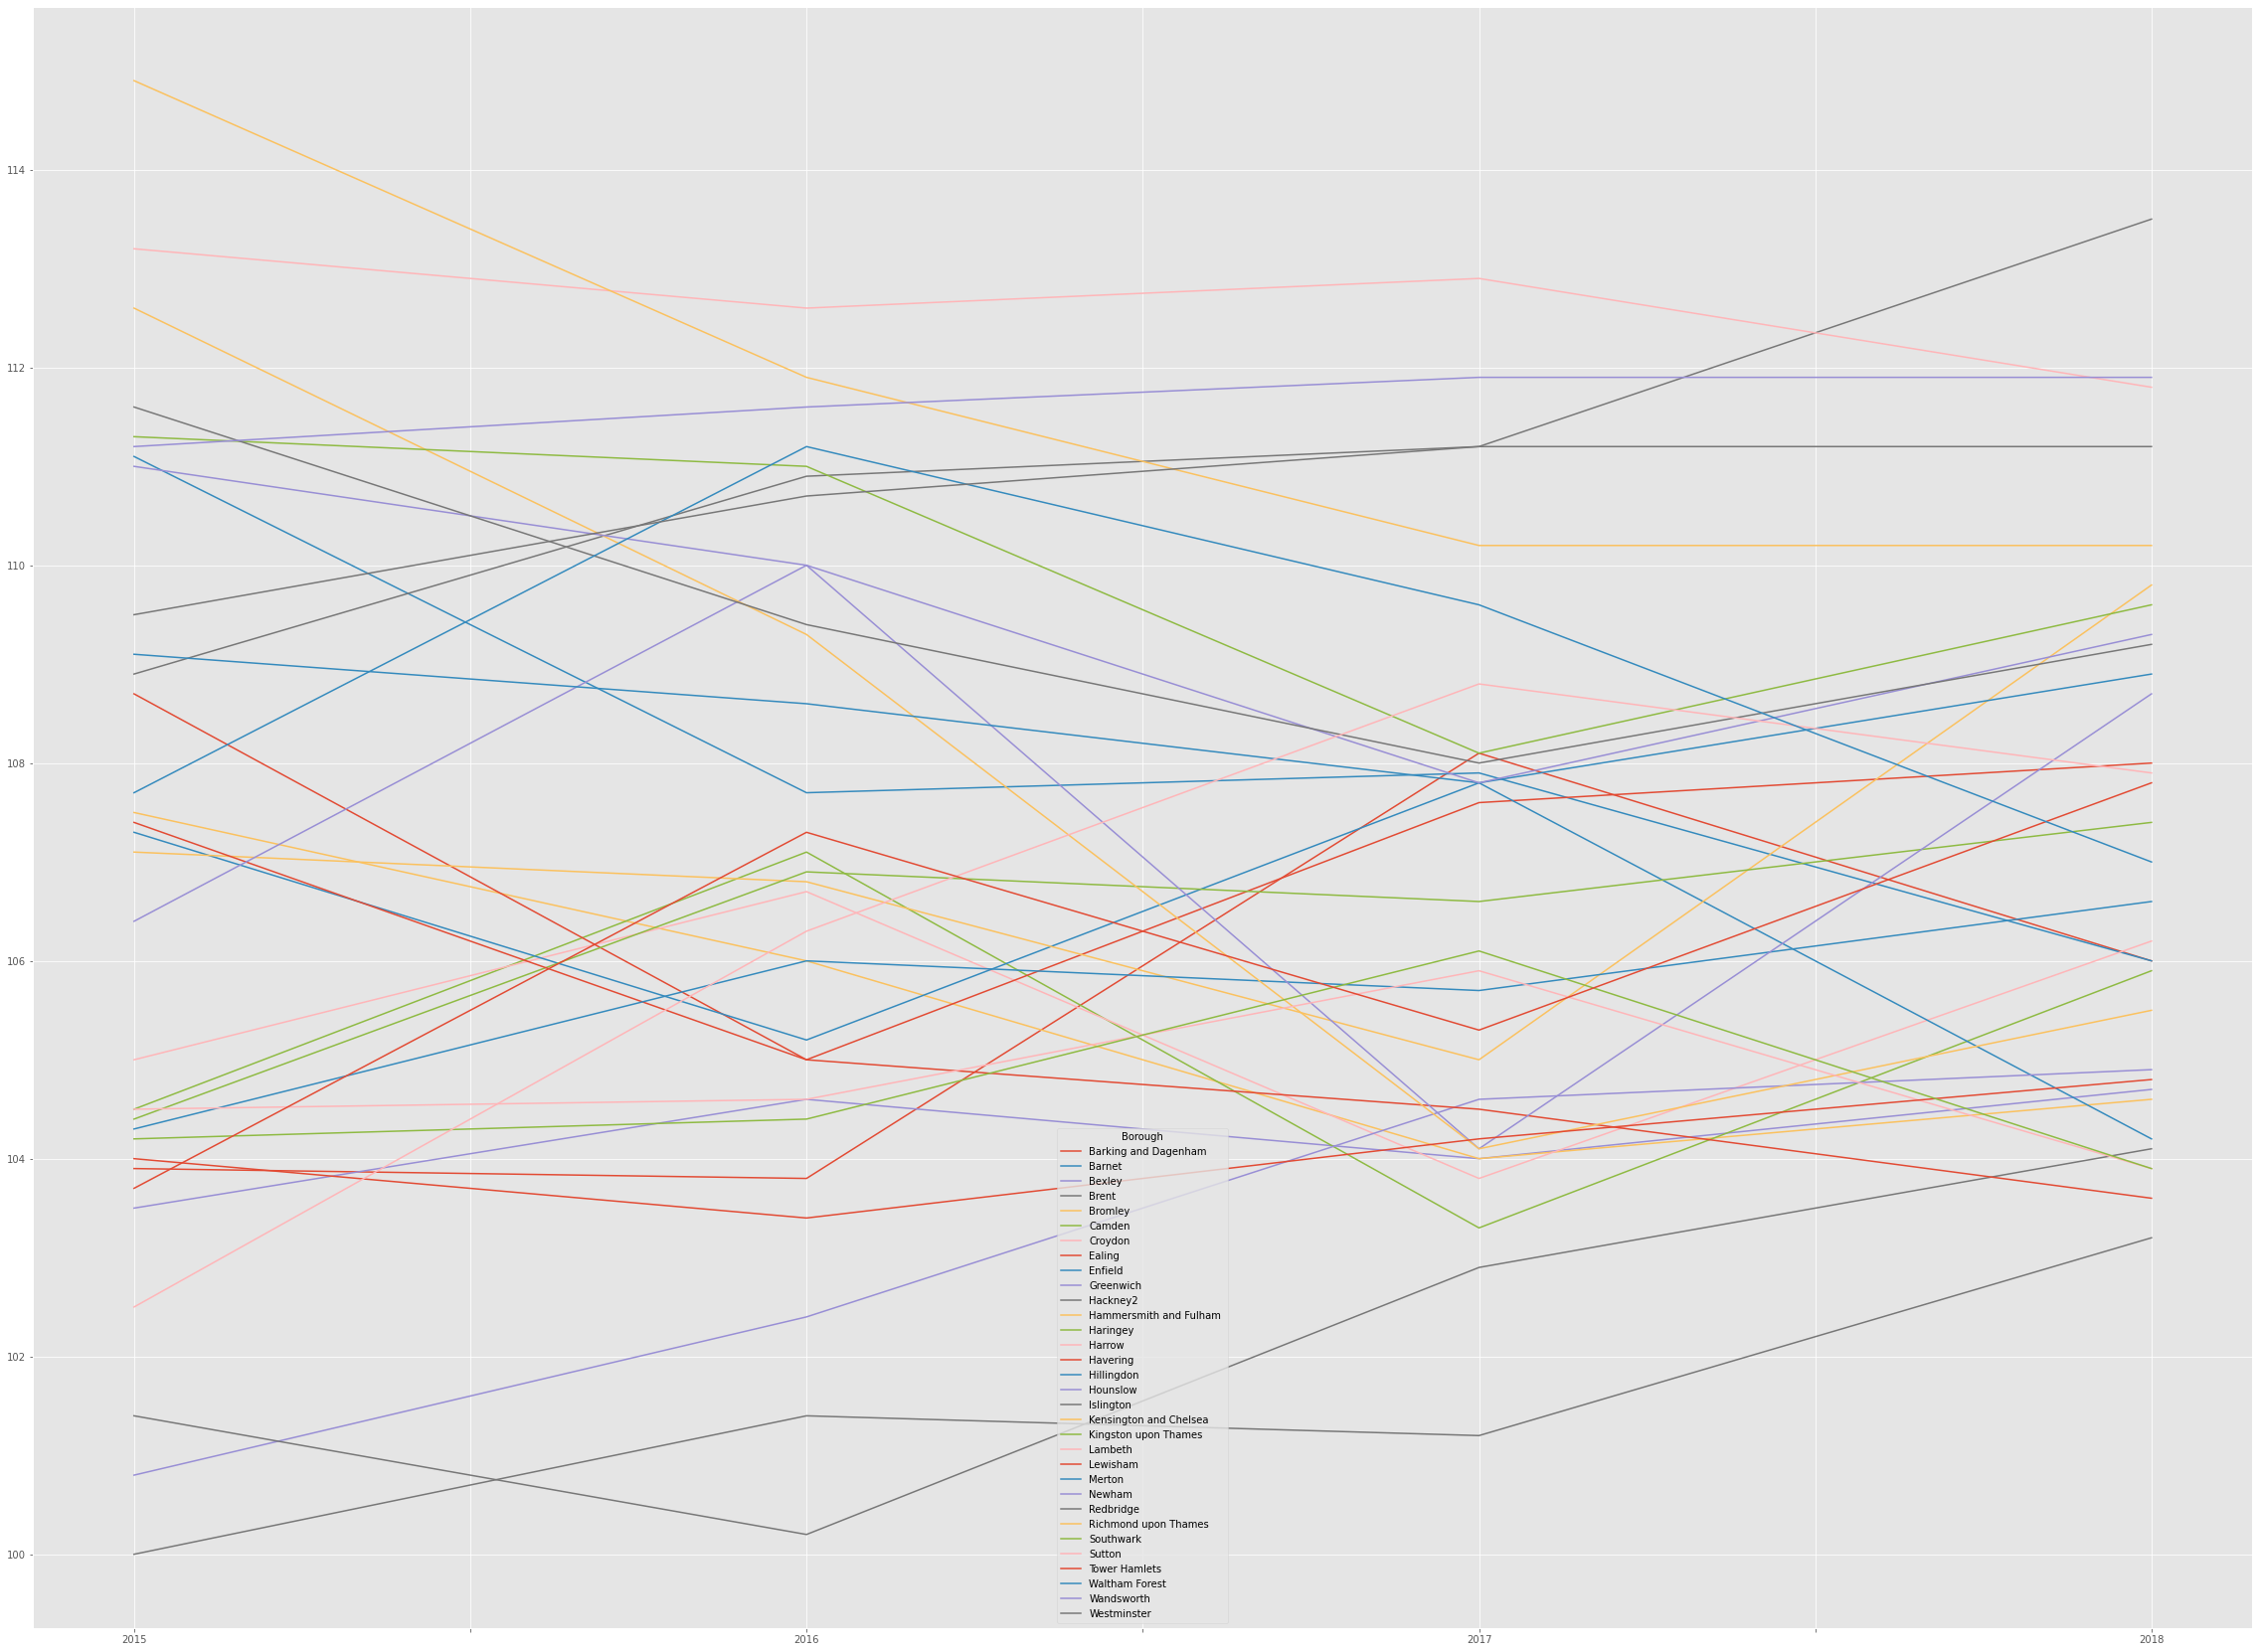

In [179]:
df_HP0.plot(kind = 'line', figsize =(40,30))

As you can see it is rather difficult to understand gain much insight here. There are too many boroughs all with different level of imporvement or deterioration in this index. 

It is possible to graph each year as a bar chart or as astacked bar chat instead. This will allow for a better comparison of how each borough has changed but as these changes are incredibly small, such as, Barking and Dangenham's decrease by 0.1 between 2015 and 2016. Not much insight will be gained from visulaising the data this way. 

So, instead, I will be calculating the average of each borough between 2015 to 2018 and then visualising each borough based on thier average HP indexes. Furthermore, I will sort by the highest average and examine the trend of the borough with the highest average, medium average and lowest average. <b> First let's transpose the df so it is easier to calculate the mean </b>

In [180]:
A = df_HP.mean(axis = 1)
A = pd.DataFrame(A)
mean = A.rename(columns = {0:'Average'})

In [181]:
df_HP = df_HP.merge(mean, how = 'right', on = 'Borough')

In [182]:
df_HP.sort_values(['Average'], ascending = False)

,2015,2016,2017,2018,Average
Borough,,,,,
Harrow,113.2,112.6,112.9,111.8,112.625
Richmond upon Thames,114.9,111.9,110.2,110.2,111.800
Wandsworth,111.2,111.6,111.9,111.9,111.650
Brent,108.9,110.9,111.2,113.5,111.125
Westminster,109.5,110.7,111.2,111.2,110.650
Kingston upon Thames,111.3,111.0,108.1,109.6,110.000
Redbridge,111.6,109.4,108.0,109.2,109.550
Newham,111.0,110.0,107.8,109.3,109.525
Waltham Forest,107.7,111.2,109.6,107.0,108.875


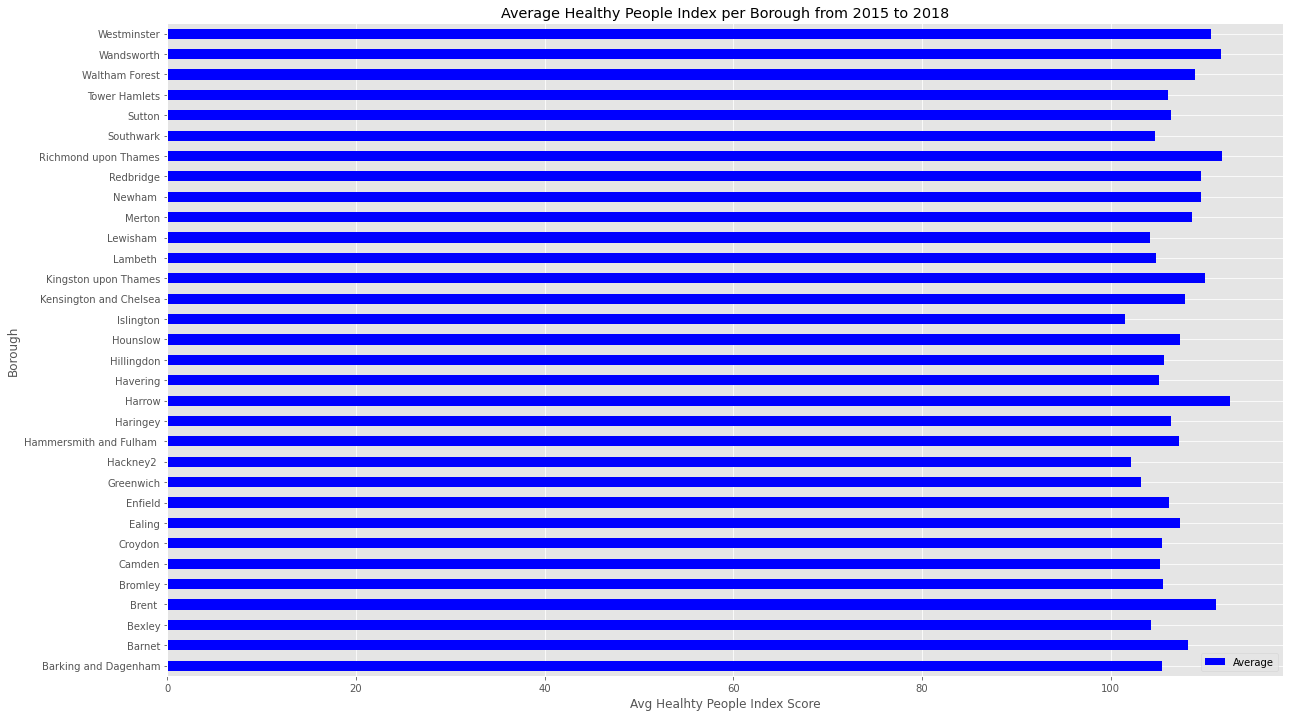

In [183]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

mean.plot(kind ='barh', color = 'blue', figsize = (20,12))

plt.title('Average Healthy People Index per Borough from 2015 to 2018')
plt.xlabel('Avg Healhty People Index Score')
plt.ylabel('Borough')

plt.show()

This bar graph although a little cluttered, visualises the avaerage improvements that each borough has seen over between 2015 - 2018. 

We can see that Harrow has the highest average and that islington has the lowest, with a 11.175 difference between the two. But this doesn't nessecarily reflect whether these boroughs are improving or deteriorting. It just tells the average state over the years. <b> One way to visulise the actuall improvement woud be taking the average of the changes between each year, rather than just the average of the scores. This is refelcted later when we examin the trend between the Islinglton and Harrow.</b> 

Now, let's plot these two to see the trends between them. As well as, taking the enitre avaerge of each year and then ploting the trend of the whole of London.

In [184]:
trend = df_HP.loc[['Harrow', 'Islington']]
trend = trend.drop(columns = ['Average'])
trend = trend.reset_index()
trend

,Borough,2015,2016,2017,2018
0,Harrow,113.2,112.6,112.9,111.8
1,Islington,100.0,101.4,101.2,103.2


In [186]:
df_HP.mean(axis = 0)

2015       106.975000
2016       107.125000
2017       106.693750
2018       107.196875
Average    106.997656
dtype: float64

In [187]:
London = pd.DataFrame({'Borough':['London'],
                       '2015':['106.9'],
                       '2016':['107.1'], 
                       '2017':['106.6'],
                       '2018':['107.1']
                      })
trend0 = trend.append(London)
trend0 = trend0.set_index('Borough',drop = True)
trend0 = trend0.astype(float)
trend0

,2015,2016,2017,2018
Borough,,,,
Harrow,113.2,112.6,112.9,111.8
Islington,100.0,101.4,101.2,103.2
London,106.9,107.1,106.6,107.1


In [188]:
trend1 = trend0.transpose()
trend1

Borough,Harrow,Islington,London
2015,113.2,100.0,106.9
2016,112.6,101.4,107.1
2017,112.9,101.2,106.6
2018,111.8,103.2,107.1


Text(0, 0.5, 'Healthy People Index Score')

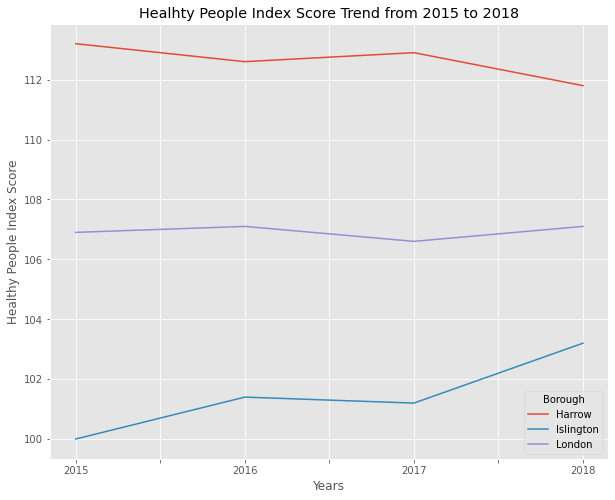

In [189]:
trend1.plot(kind= 'line', figsize =(10,8))

plt.title('Healhty People Index Score Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Healthy People Index Score')

Here we can see that despite, the fact that Harrow had a much higher average score than Islington in the HP index. They, unfortunatley, have experienced a decline over the years and are on a downwards trend. Where as, Islington, on the other hand, have seen incredible imporovment from 2015  to 2018. This is might be considered a more important factor than the simple avaerage as it suggest that Islington is improving from its lower scores. 

Whats more important here is looking at the average score each year for the whole of London. As we can see here, the trend for Lonodon, is marginal improvements. As it is the avaerge trend across london outliers, like Islington, will affect the trends. <b> Once more, it seems that to get a better picture of whether or not a borough or city is imporving, we shoudl take the average of the changes between each year rather than just the avaerge score. Unfortunaly, as that is not within the scoope of this exploration of this particular subdomain. I will not be examing this aspect here. Rather, I will be using this as justification for looking at the average changes between each year for the Overall Health Index.</b>

### Healthy Live Index

This Index score focuses on the healthy behaviours of people within each neighbourhood. This subdomain index was developed using the following attirbutes: <ul>
    <li>Psychological risk factors</li>
    <li>Behavioural risk factors</li>
    <li>Unemployment</li>
    <li>Working conditions</li>
    <li>Risk factors for children</li>
    <li>Children and young people's education</li>
    <li>Protective measures</li>
    </ul>

This arguebly is the most pertinent subdomin to helping business owners start a gym. 

In [190]:
HL15 = HI15
HL15 = HL15[['Borough', '2015 Healthy Lives']].copy()
HL16 = HI16[['2016 Healthy Lives']].copy()
HL17 = HI17[['2017 Healthy Lives']].copy()
HL18 = HI18[['2018 Healthy Lives']].copy()

In [191]:
HL0 = HL15.join(HL16)
HL0 = HL0.join(HL17)
HL0 = HL0.join(HL18)
HL0.set_index('Borough', inplace = True)
HL = HL0.rename(columns ={'2015 Healthy Lives': '2015', '2016 Healthy Lives': '2016', '2017 Healthy Lives': '2017', '2018 Healthy Lives': '2018'})
HL = HL.astype(float)
HL.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,90.9,93.1,94.3,94.0
Barnet,102.6,104.6,105.0,104.7
Bexley,99.8,103.0,101.4,102.9
Brent,96.3,97.0,96.1,96.4
Bromley,105.0,106.2,107.0,106.6


In [192]:
HLA = HL.mean(axis = 1)
HLA = pd.DataFrame(HLA)
HLA = HLA.rename(columns = {0:'Average'})

In [193]:
HLA = HLA[['Average']].div(100).round(2)

In [194]:
HL = HL.merge(HLA, how = 'right', on = 'Borough')
HL.head()

,2015,2016,2017,2018,Average
Borough,,,,,
Barking and Dagenham,90.9,93.1,94.3,94.0,0.93
Barnet,102.6,104.6,105.0,104.7,1.04
Bexley,99.8,103.0,101.4,102.9,1.02
Brent,96.3,97.0,96.1,96.4,0.96
Bromley,105.0,106.2,107.0,106.6,1.06


In [195]:
HL.sort_values(['Average'], ascending = False)

,2015,2016,2017,2018,Average
Borough,,,,,
Richmond upon Thames,110.5,112.4,113.3,113.8,1.12
Kingston upon Thames,108.5,110.4,110.3,108.8,1.10
Wandsworth,103.7,105.9,107.7,106.9,1.06
Bromley,105.0,106.2,107.0,106.6,1.06
Westminster,103.1,104.8,105.7,106.9,1.05
Camden,104.2,105.2,104.8,105.2,1.05
Southwark,102.7,104.0,103.8,103.8,1.04
Kensington and Chelsea,103.5,102.9,105.3,103.3,1.04
Barnet,102.6,104.6,105.0,104.7,1.04


In [196]:
HLA = HLA.reset_index()
HLA = HLA.sort_values('Average', ascending = False)
HLA.head()

,Borough,Average
25,Richmond upon Thames,1.12
19,Kingston upon Thames,1.10
30,Wandsworth,1.06
4,Bromley,1.06
31,Westminster,1.05


In [197]:
HLA0 = HLA.reset_index()
HLA0 = HLA0.rename(columns ={'index': 'Borough Number'})
HLA0 = HLA0.set_index('Borough Number')
HLA0

,Borough,Average
Borough Number,,
25,Richmond upon Thames,1.12
19,Kingston upon Thames,1.10
30,Wandsworth,1.06
4,Bromley,1.06
31,Westminster,1.05
5,Camden,1.05
26,Southwark,1.04
18,Kensington and Chelsea,1.04
1,Barnet,1.04


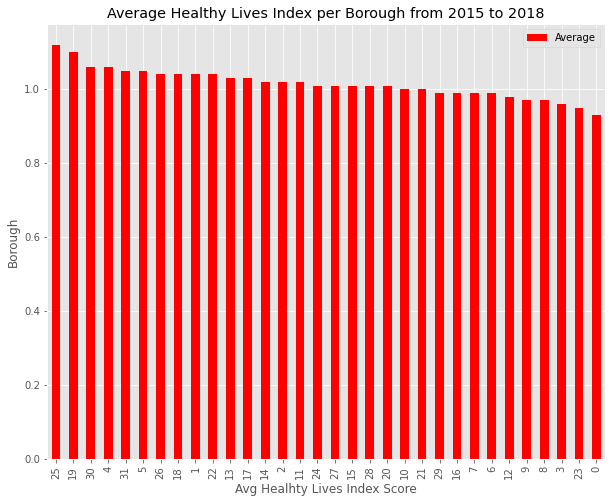

In [198]:
HLA.plot(kind ='bar', color = 'red', figsize = (10, 8))
plt.title('Average Healthy Lives Index per Borough from 2015 to 2018')
plt.xlabel('Avg Healhty Lives Index Score')
plt.ylabel('Borough')

plt.show()

In [199]:
hltrend = HL.loc[['Richmond upon Thames', 'Barking and Dagenham', 'Redbridge',]]
hltrend = hltrend.drop(['Average'], axis = 1)
hltrend = hltrend.reset_index()
hltrend

,Borough,2015,2016,2017,2018
0,Richmond upon Thames,110.5,112.4,113.3,113.8
1,Barking and Dagenham,90.9,93.1,94.3,94.0
2,Redbridge,100.8,103.3,99.7,99.0


In [200]:
HL.mean(axis = 0)

2015       100.315625
2016       101.818750
2017       101.909375
2018       101.740625
Average      1.015313
dtype: float64

In [201]:
LL = pd.DataFrame({'Borough':['London'],
                       '2015':['100.315'],
                       '2016':['101.818'], 
                       '2017':['101.909'],
                       '2018':['101.74']
                      })

In [202]:
hltrend = hltrend.append(LL)

In [203]:
hltrend = hltrend.set_index('Borough',drop = True)
hltrend = hltrend.astype(float)
hltrend

,2015,2016,2017,2018
Borough,,,,
Richmond upon Thames,110.500,112.400,113.300,113.80
Barking and Dagenham,90.900,93.100,94.300,94.00
Redbridge,100.800,103.300,99.700,99.00
London,100.315,101.818,101.909,101.74


In [204]:
hltrend = hltrend.transpose()

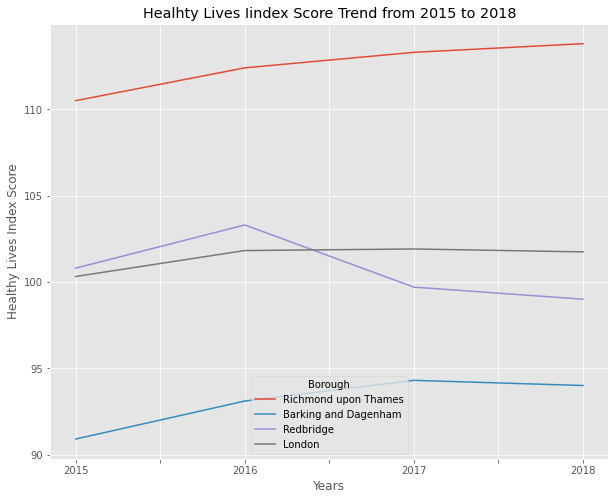

In [205]:
hltrend.plot(kind= 'line', figsize =(10,8))

plt.title('Healhty Lives Iindex Score Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Healthy Lives Index Score')

plt.show()

## Healthy Places 

The Healthy Places index is the final subdomain used to asses the health of individual boroughs. It refelcts the quality of the enviroment a borough, but also includes scocial factors that affects living standard of a borough. The attirbutes used to develop the Healthy Places index are: 
<ul> 
    <li>Access to green space</li>
    <li>Local environment</li>
    <li>Access to services</li>
    <li>Access to housing</li>
    <li>Crime</li>
    </ul>

This is factor alone is rather important to out target audience. Firstly, if you were a bussiness owner and are looking to open a gym, one of the major factors that would influences the number of clients enrolling in a subscription would be directly impacted by the crime levels of neighbourhood or borough. A borough with a high crime rate is a risk and a negativ factor for each member of the target audience. You would be less inclined to attend a gym in a specific borough over another if it meant risking being in danger. 

Furthermore, factors like access to services and housing will influcence how likely people are to attend a gym. AS we continously see with society, people value their time and convience is a must. Having a gym that is in a borough that has a higher access to daily services, like shops, banks, resturants and work envrioments are advantageous. Furthermore, more people are likly to join or go to gyms that live near to them as it is more convenient. However, as this report is attempting to examine, there are various factors that can outweigh convience. 

With this in mind, let move on to examining the data. 


In [206]:
HE15 = HI15
HE15 = HE15[['Borough', '2015Healthy Places']].copy()
HE16 = HI16[['2016 Healthy Places']].copy()
HE17 = HI17[['2017 Healthy Places']].copy()
HE18 = HI18[['2018 Healthy Places']].copy()

In [207]:
HE0 = HE15.join(HE16)
HE0 = HE0.join(HE17)
HE0 = HE0.join(HE18)
HE0.set_index('Borough', inplace = True)
HE = HE0.rename(columns ={'2015Healthy Places': '2015', '2016 Healthy Places': '2016', '2017 Healthy Places': '2017', '2018 Healthy Places': '2018'})
HE = HE.astype(float)
HE.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,96.9,96.9,97.0,95.7
Barnet,97.1,96.6,96.2,95.6
Bexley,101.5,100.3,99.6,99.9
Brent,94.9,95.0,94.2,93.9
Bromley,99.5,98.9,98.5,98.3


In [208]:
HEA = HE.mean(axis = 1)
HEA = pd.DataFrame(HEA)
HEA = HEA.rename(columns = {0:'Average'})

In [209]:
HEA = HEA[['Average']].div(100).round(2)

In [210]:
HE = HE.merge(HEA, how = 'right', on = 'Borough')
HE.head()

,2015,2016,2017,2018,Average
Borough,,,,,
Barking and Dagenham,96.9,96.9,97.0,95.7,0.97
Barnet,97.1,96.6,96.2,95.6,0.96
Bexley,101.5,100.3,99.6,99.9,1.00
Brent,94.9,95.0,94.2,93.9,0.94
Bromley,99.5,98.9,98.5,98.3,0.99


In [211]:
HE.sort_values(['Average'], ascending = False)

,2015,2016,2017,2018,Average
Borough,,,,,
Sutton,101.5,100.5,100.8,100.3,1.01
Bexley,101.5,100.3,99.6,99.9,1.00
Havering,100.5,99.1,98.6,100.1,1.00
Richmond upon Thames,100.5,99.3,98.7,99.2,0.99
Bromley,99.5,98.9,98.5,98.3,0.99
Harrow,99.5,98.8,98.5,97.8,0.99
Merton,99.4,98.3,98.7,97.6,0.98
Hillingdon,97.6,97.2,96.4,95.9,0.97
Barking and Dagenham,96.9,96.9,97.0,95.7,0.97


In [212]:
HEA = HEA.reset_index()
HEA = HEA.sort_values('Average', ascending = False)
HEA.head()

,Borough,Average
27,Sutton,1.01
2,Bexley,1.00
14,Havering,1.00
25,Richmond upon Thames,0.99
4,Bromley,0.99


In [213]:
HEA0 = HEA.reset_index()
HEA0 = HEA0.rename(columns ={'index': 'Borough Number'})
HEA0 = HEA0.set_index('Borough Number')
HEA0

,Borough,Average
Borough Number,,
27,Sutton,1.01
2,Bexley,1.00
14,Havering,1.00
25,Richmond upon Thames,0.99
4,Bromley,0.99
13,Harrow,0.99
22,Merton,0.98
15,Hillingdon,0.97
0,Barking and Dagenham,0.97


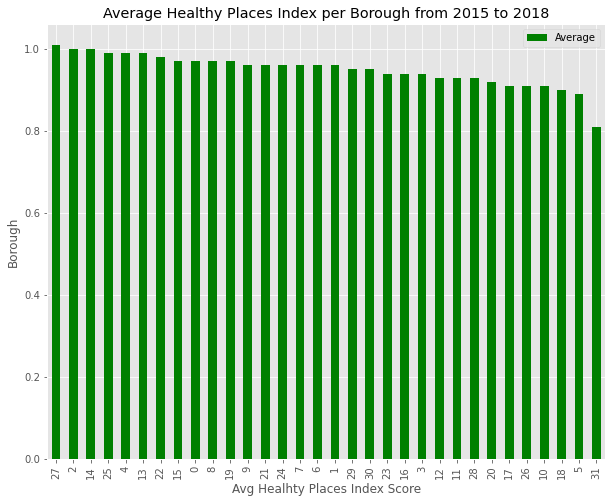

In [214]:
HEA.plot(kind ='bar', color = 'green', figsize = (10, 8))
plt.title('Average Healthy Places Index per Borough from 2015 to 2018')
plt.xlabel('Avg Healhty Places Index Score')
plt.ylabel('Borough')

plt.show()

In [216]:
hetrend = HE.loc[['Sutton', 'Westminster', 'Croydon',]]
hetrend = hetrend.drop(['Average'], axis = 1)
hetrend = hetrend.reset_index()
hetrend

,Borough,2015,2016,2017,2018
0,Sutton,101.5,100.5,100.8,100.3
1,Westminster,82.4,83.1,81.2,78.5
2,Croydon,96.7,95.7,96.2,96.5


In [217]:
HE.mean(axis = 0)

2015       95.759375
2016       95.200000
2017       94.537500
2018       94.256250
Average     0.948750
dtype: float64

In [218]:
LE = pd.DataFrame({'Borough':['London'],
                       '2015':['95.759'],
                       '2016':['95.200'], 
                       '2017':['94.537'],
                       '2018':['94.256']
                      })

In [219]:
hetrend = hetrend.append(LE)

In [220]:
hetrend = hetrend.set_index('Borough',drop = True)
hetrend = hetrend.astype(float)
hetrend

,2015,2016,2017,2018
Borough,,,,
Sutton,101.500,100.5,100.800,100.300
Westminster,82.400,83.1,81.200,78.500
Croydon,96.700,95.7,96.200,96.500
London,95.759,95.2,94.537,94.256


In [221]:
hetrend = hetrend.transpose()

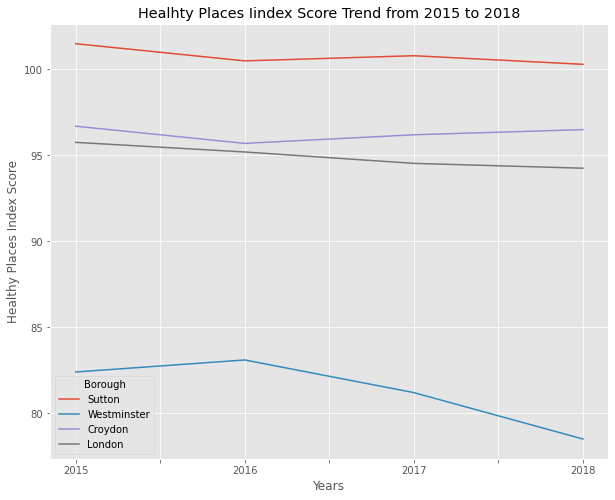

In [222]:
hetrend.plot(kind= 'line', figsize =(10,8))
plt.title('Healhty Places Iindex Score Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Healthy Places Index Score')

plt.show()

The graph above illustrates the trend of Sutton, a the borough with th ehighest Healthy place index, Westminster, which is the brough with the lowest average healthy place index score and Cryondon, which is in the middle. As well as, the overall trend of London as a whole. 

As the lines depict has been a decline in the Healthy places index score. While Westminster has seen a very steep decline from 2016, Sutton has also seen a decline since 2016, although of a much lower gradient. What's more is that both of these borough are in line with the overall trend of London, which has also declined over the years. As this line is the avaerage scores of every borough together, the gradient or the trending decline is more telling. Unlike with the earlier indexes there are no kinks in the line. It is a steady decline. 

An in depth answer to why there is a steady decline would require a much futher analysis of the data. One which is outside the scope of this prooject. However, one explination or presummption is that this score will always trend downhill as population increase. The attirbutes that compose the Healthy Places index would be heavily influence by an increase population. This is one possible explination of this trend. 

Oddly enough, however, We can see that Croydon is defying the overall trend and has seen a steady imporvement from 2016 onwards. This could be due to an increase in green areas, more housing being developed or a decline in crime. It is unclear what has caused this change. 

### The Overall Health index

With the individual subdomains briefly explored, some understanding hopefully has been convayed as to how the overall score has been developed. The overall score of each borough is the avaerage of all of its subdomains each year. Thus, a boroughs Health index for 2015 is the average of it Health people, Healhty Lives and Healthy places scores. 

The next few cells will focuse on exploring this score in a similar manner as before. Crucially, though, the following analysis will go a step further and look at the average change that each borough has seen over the years. This is important to members in the target audience that are looking at capitalising on boroughs that are developing and will have better scores in the future.  

In [223]:
H15 = HI15[['Borough', '2015 Overall Health Index (AVG) ']].copy()
H16 = HI16_df[['2016 Overall Health Index (AVG) ']].copy()
H17 = HI17_df[['2017 Overall Health Index (AVG) ']].copy()
H18 = HI18_df[['2018 Overall Health Index (AVG) ']].copy()

In [255]:
H0 = H15.join(H16)
H0 = H0.join(H17)
H0 = H0.join(H18)
H0.set_index('Borough', inplace = True)
H = H0.rename(columns ={'2015 Overall Health Index (AVG) ': '2015', '2016 Overall Health Index (AVG) ': '2016', '2017 Overall Health Index (AVG) ': '2017', '2018 Overall Health Index (AVG) ': '2018'})
H = H.astype(float)
H.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,97.2,97.9,99.8,98.6
Barnet,103.6,103.0,103.0,102.1
Bexley,101.6,102.6,101.7,102.5
Brent,100.0,101.0,100.5,101.3
Bromley,104.0,103.7,103.1,103.2


In [261]:
HA = H.mean(axis = 1)
HA = pd.DataFrame(HA)
HA = HA.rename(columns = {0:'Average'})
HA = HA[['Average']].div(100).round(2)
HA = HA.sort_values('Average', ascending = False)
HA

,Average
Borough,
Richmond upon Thames,1.08
Kingston upon Thames,1.06
Harrow,1.05
Wandsworth,1.04
Merton,1.04
Sutton,1.03
Barnet,1.03
Bromley,1.03
Havering,1.02


In [239]:
H = H.merge(HA, how = 'right', on = 'Borough')
H.head()

,2015,2016,2017,2018,Average
Borough,,,,,
Barking and Dagenham,97.2,97.9,99.8,98.6,0.98
Barnet,103.6,103.0,103.0,102.1,1.03
Bexley,101.6,102.6,101.7,102.5,1.02
Brent,100.0,101.0,100.5,101.3,1.01
Bromley,104.0,103.7,103.1,103.2,1.03


In [284]:
H['Growth from 2015 to 2018'] = H['2018'] - H['2015']
H['Average Growth'] = H['Growth from 2015 to 2018'].div(3).round(2)
H['AVG Growth %'] = H['Average Growth'].mul(100)
H

,2015,2016,2017,2018,Growth from 2015 to 2018,Average Growth,AVG Growth %
Borough,,,,,,,
Barking and Dagenham,97.2,97.9,99.8,98.6,1.4,0.47,47.0
Barnet,103.6,103.0,103.0,102.1,-1.5,-0.50,-50.0
Bexley,101.6,102.6,101.7,102.5,0.9,0.30,30.0
Brent,100.0,101.0,100.5,101.3,1.3,0.43,43.0
Bromley,104.0,103.7,103.1,103.2,-0.8,-0.27,-27.0
Camden,99.7,101.0,98.4,99.7,0.0,0.00,0.0
Croydon,100.0,100.6,99.5,100.7,0.7,0.23,23.0
Ealing,101.5,100.0,101.1,100.9,-0.6,-0.20,-20.0
Enfield,100.7,100.0,100.1,98.7,-2.0,-0.67,-67.0


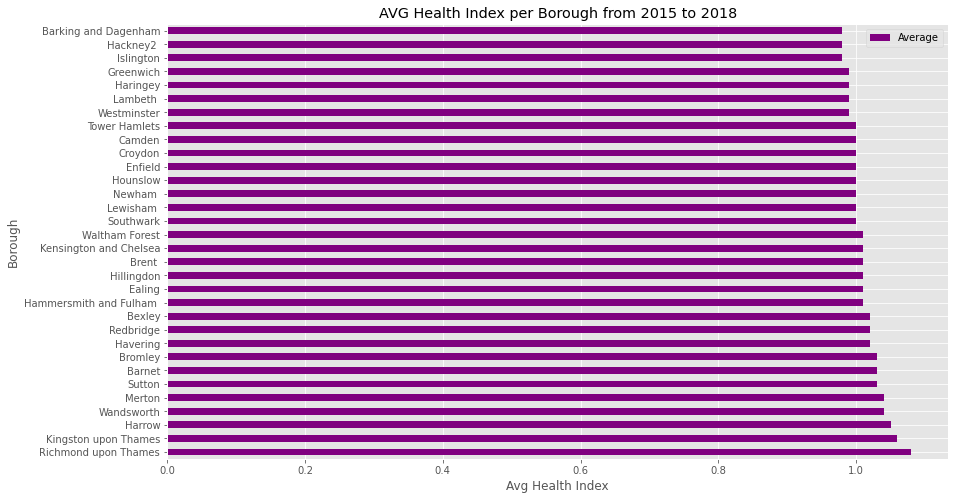

In [285]:
HA.plot(kind ='barh', color = 'purple', figsize = (14, 8))
plt.title('AVG Health Index per Borough from 2015 to 2018')
plt.xlabel('Avg Health Index')
plt.ylabel('Borough')

plt.show()

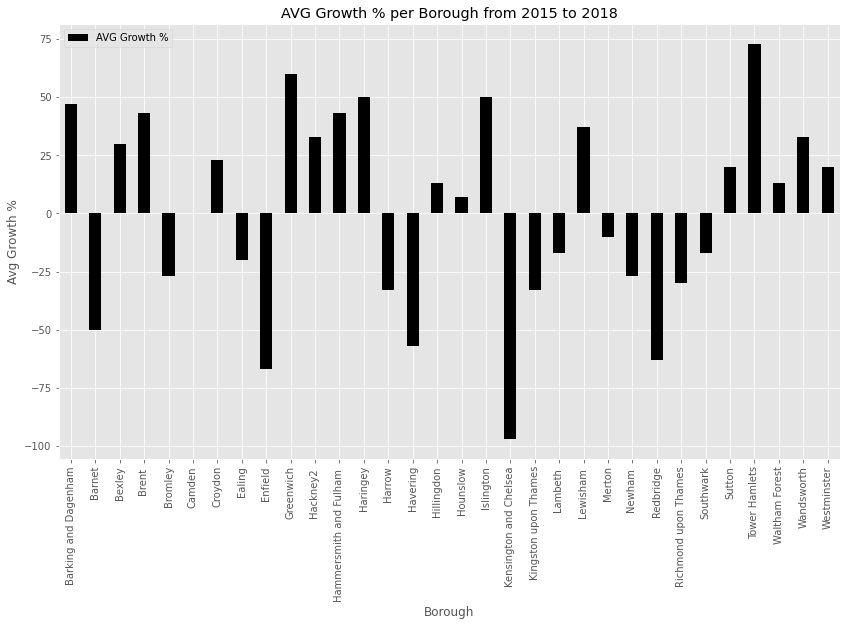

In [296]:
OG = H[['AVG Growth %']].copy()
OG.plot(kind ='bar', color = 'k', figsize = (14, 8))
plt.title('AVG Growth % per Borough from 2015 to 2018')
plt.xlabel('Borough')
plt.ylabel('Avg Growth %')

plt.show()

In [287]:
Htrend = H.loc[['Richmond upon Thames', 'Barking and Dagenham', 'Tower Hamlets', 'Kensington and Chelsea' ]]
Htrend = Htrend.drop(['Growth from 2015 to 2018', 'Average Growth', 'AVG Growth %'], axis = 1)
Htrend = Htrend.reset_index()
Htrend

,Borough,2015,2016,2017,2018
0,Richmond upon Thames,108.6,107.9,107.4,107.7
1,Barking and Dagenham,97.2,97.9,99.8,98.6
2,Tower Hamlets,98.7,100.1,99.7,100.9
3,Kensington and Chelsea,102.3,101.1,99.8,99.4


In [288]:
H.mean(axis = 0)

2015                        101.018750
2016                        101.387500
2017                        101.050000
2018                        101.065625
Growth from 2015 to 2018      0.046875
Average Growth                0.014688
AVG Growth %                  1.468750
dtype: float64

In [289]:
L = pd.DataFrame({'Borough':['London'],
                       '2015':['101.019'],
                       '2016':['101.388'], 
                       '2017':['101.05'],
                       '2018':['101.066']
                      })
Htrend = Htrend.append(L)

In [290]:
Htrend = Htrend.set_index('Borough',drop = True)
Htrend = Htrend.astype(float)
Htrend

,2015,2016,2017,2018
Borough,,,,
Richmond upon Thames,108.600,107.900,107.40,107.700
Barking and Dagenham,97.200,97.900,99.80,98.600
Tower Hamlets,98.700,100.100,99.70,100.900
Kensington and Chelsea,102.300,101.100,99.80,99.400
London,101.019,101.388,101.05,101.066


In [292]:
Htrend = Htrend.transpose()

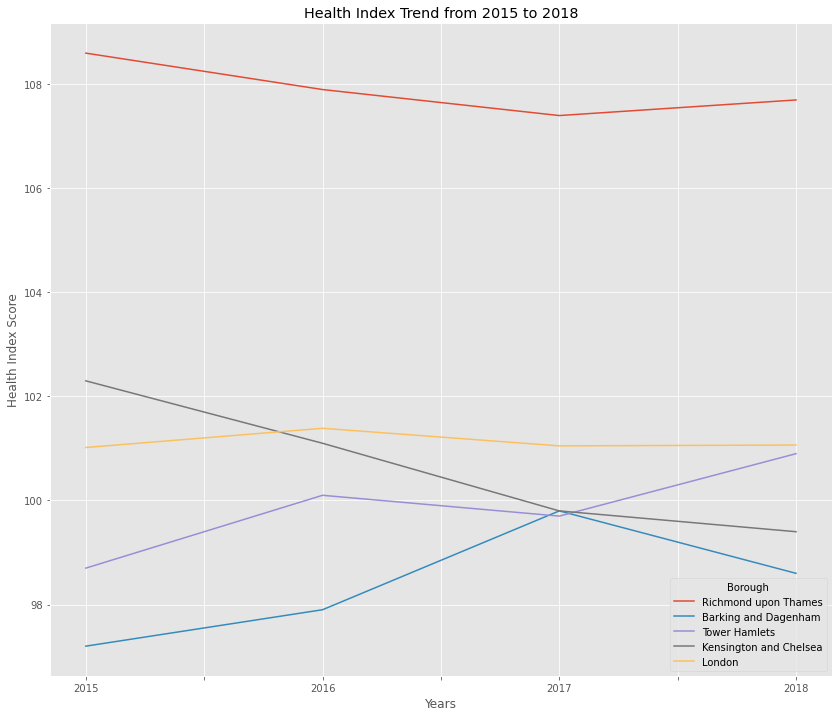

In [293]:
Htrend.plot(kind= 'line', figsize =(14,12))
plt.title('Health Index Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Health Index Score')

plt.show()

We can see in the graph above that there is a varying degree of difference between neighbourhoods. The graph reflects mainly the outliers of all of the boroughs. This is intentioanal it can be used to asses whether there are borough that are improving and could be potential areas to open a Gym. <b> This is particularlly the case with Tower Hamlets. </b> We can see that in comparision to the yellow line, London's overall trend, Tower Hamlets has seen a very drastic improvement in its Health Index from 2015 to 2018. This could potentially mean that the borough is seeing a lot of developement and could continue to improve further down the line. 

As a business owner or potential business owner this is can be increidibly attracitive. As it could mean investing in opening a Gym in a borough now and, hopfully, capitalising on future developement and customers. 

<b> Unforutnaly, the Health Index data doesn't include any data concering how each borough has been affected by Covid19 and the restrictions that have come into place. Without this we can not state that the trends shown above have or will be consistent. In fact, the trends and growths that some of these boroughs has seen in the previous years may have been either completely halted or eroded by the affects of Covid. </b>

As such, safe guarding against Covid and Lockdown restrictions is an important factor for those looking to attend or run a gym. And to attempt to do so we need to look at the vaccine data per borough. 

# Vaccine Data

The intended use of the vaccine data is to analyse which boroughs have a higher levels of vaccincation than others. In doing so, it provides our target audience an other set of information on each borough to help them perhaps choose where a borough which <b> may</b> see a slower rate of infection. 

Furthermore, as gyms are considered a hotspot for Covid 19, areas that have a high R repoduciton rate of the virus are more likely to see lockdowns which shut gyms down. While, inversely area with higher vaccine rates will have a lower R repoduction rate and are <b> likely </b> to see less restrictions. This could mean being able to keep gyms open in one borough, which may mean maintaing monthly subcriptions from customers. While in another borough all gyms are closed. 

In [120]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='phe_vaccines_age_london_boroughs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


,area_name,area_code,date,dose,age_band,age_higher,age_lower,cum_doses,new_doses,population,new_prop,cum_prop
0,Barking and Dagenham,E09000002,08/12/2020,1st dose,18 - 24 years,24,18,0,0,18002,0.000000,0.000000
1,Barking and Dagenham,E09000002,08/12/2020,1st dose,25 - 29 years,29,25,0,0,15974,0.000000,0.000000
2,Barking and Dagenham,E09000002,08/12/2020,1st dose,30 - 34 years,34,30,1,1,18025,0.000056,0.000056
3,Barking and Dagenham,E09000002,08/12/2020,1st dose,35 - 39 years,39,35,0,0,17063,0.000000,0.000000
4,Barking and Dagenham,E09000002,08/12/2020,1st dose,40 - 44 years,44,40,0,0,15236,0.000000,0.000000


Before moiving on to cleaning the data. PLease note, that the original data set records both 1st dose and 2nd dose separatly. AS mentioned in the data section of the report, I will only be taking  entries with 2nd dose as an indiivdual who is vaccinated. 

In [122]:
df = df_data_5.drop(columns = ['area_code', 'date', 'age_band', 'age_higher', 'age_lower', 'new_doses','cum_doses', 'population', 'new_prop', 'cum_prop'])
df.head()

,area_name,dose
0,Barking and Dagenham,1st dose
1,Barking and Dagenham,1st dose
2,Barking and Dagenham,1st dose
3,Barking and Dagenham,1st dose
4,Barking and Dagenham,1st dose


In [127]:
vc = df.replace('1st dose', np.nan, inplace = True)

In [128]:
vc.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [129]:
vc = vc.rename(columns= {'area_name': 'Borough'})

AttributeError: 'NoneType' object has no attribute 'rename'

,Borough,dose
0,Barking and Dagenham,NaN
1,Barking and Dagenham,NaN
2,Barking and Dagenham,NaN
3,Barking and Dagenham,NaN
4,Barking and Dagenham,NaN
